In [8]:
# Fake News Detection – Exploratory Data Analysis and Baseline

In [11]:
## B1. Data Acquisition and Loading
#Explain where your data comes from, show basic info

import pandas as pd
import os

# Define paths
raw_data_path = "cmse492_project/data/raw/"
processed_data_path = "cmse492_project/data/processed/"

# Load datasets
true_df = pd.read_csv(os.path.join(raw_data_path, "True.csv"))
fake_df = pd.read_csv(os.path.join(raw_data_path, "Fake.csv"))

print("True News shape:", true_df.shape)
print("Fake News shape:", fake_df.shape)

# Add labels
true_df['label'] = 1  # Real news
fake_df['label'] = 0  # Fake news

# Combine datasets
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)
print("Combined shape:", df.shape)

# Display info
display(df.head())
df.info()

# Save a small sample for testing
sample = df.sample(500, random_state=42)
sample.to_csv(os.path.join(processed_data_path, "sample_data.csv"), index=False)


True News shape: (21417, 4)
Fake News shape: (23481, 4)
Combined shape: (44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


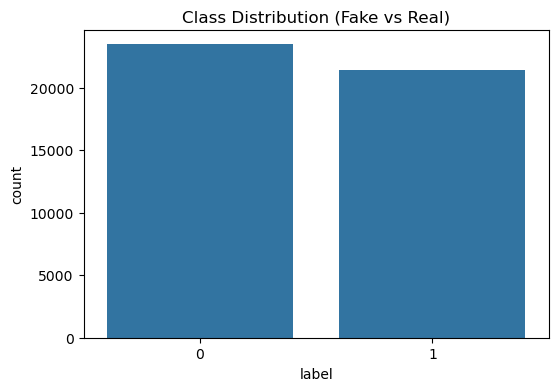

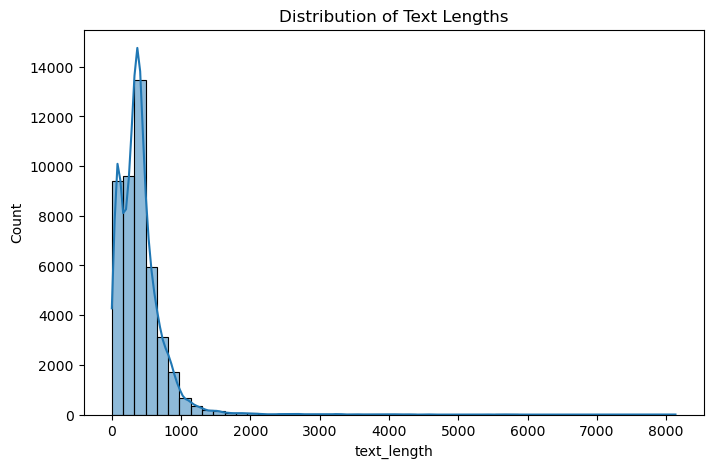

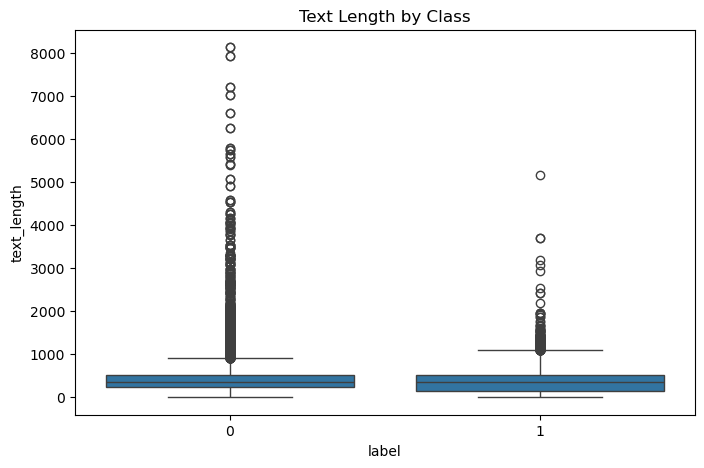

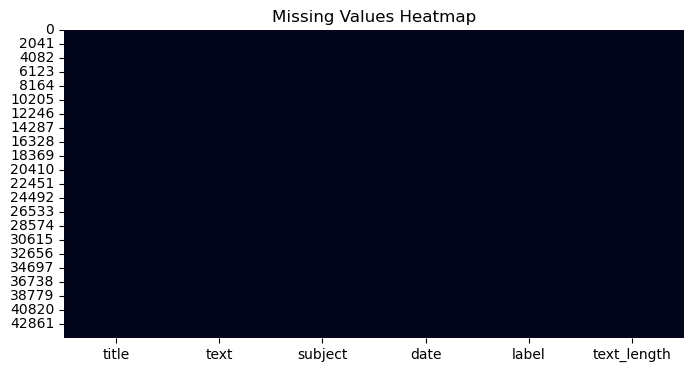

In [13]:
## B2. Initial Exploratory Data Analysis
#Add plots and discussion

import matplotlib.pyplot as plt
import seaborn as sns

# Create a column for text length
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Class Distribution (Fake vs Real)")
plt.savefig("cmse492_project/figures/class_distribution.png")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.savefig("cmse492_project/figures/text_length_distribution.png")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='text_length', data=df)
plt.title("Text Length by Class")
plt.savefig("cmse492_project/figures/text_length_by_class.png")
plt.show()

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.savefig("cmse492_project/figures/missing_values_heatmap.png")
plt.show()


In [ ]:
## B3. Baseline Model
#(Train a simple baseline model and evaluate it)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Baseline model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate
print("Baseline Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("cmse/figures/baseline_confusion_matrix.png")
plt.show()
